In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
# Check for Missing Values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# check Statistical Summary
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
# check for duplicate 
df.duplicated().sum()

0

In [9]:
# checking for unique value in individual columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
print("Categories in gender column:  ",end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity column:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental_level_of_education column:  ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch column:  ",end=" ")
print(df['lunch'].unique())

print("Categories in test_preparation_course column:  ",end=" ")
print(df['test_preparation_course'].unique())

Categories in gender column:   ['female' 'male']
Categories in race_ethnicity column:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education column:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch column:   ['standard' 'free/reduced']
Categories in test_preparation_course column:   ['none' 'completed']


In [11]:
numerical_features=[features for features in df.columns if df[features].dtypes!="O"]
categorical_features=[features for features in df.columns if df[features].dtypes=="O"]

print("Numerical Features: ",numerical_features)
print("Categorical Features: ",categorical_features)


Numerical Features:  ['math_score', 'reading_score', 'writing_score']
Categorical Features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [13]:
# Feature Engineering
df["total_score"]=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full=df[df['reading_score']==100]['average_score'].count()
writing_full=df[df['writing_score']==100]['average_score'].count()
math_full=df[df['math_score']==100]['average_score'].count()

print(f"{reading_full} scored full marks in reading")
print(f"{writing_full} scored full marks in writing")
print(f"{math_full} scored full marks in maths")

17 scored full marks in reading
14 scored full marks in writing
7 scored full marks in maths


Text(0.5, 1.0, 'Total Score Distribution by gender')

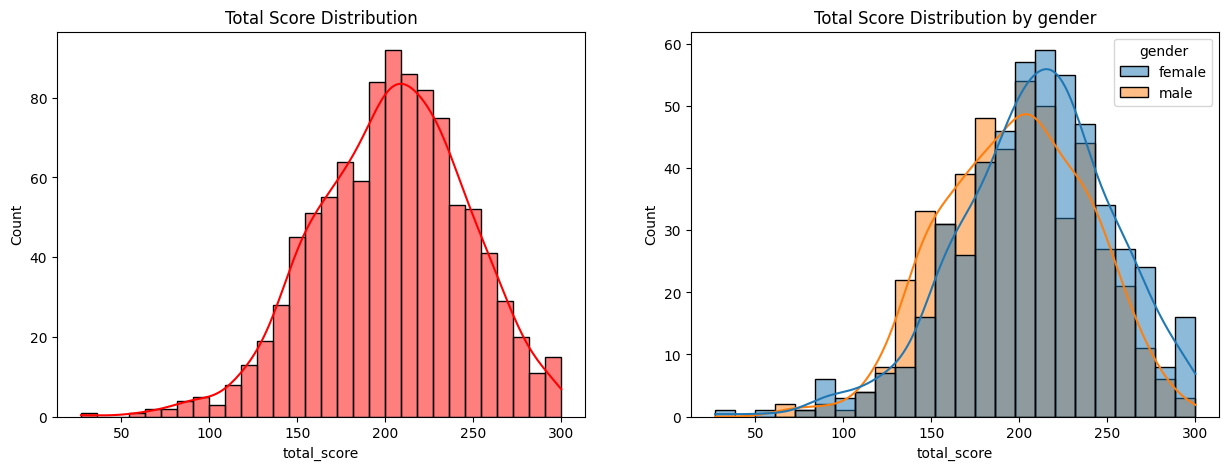

In [16]:
# histogram and KDE plot

fig,axix=plt.subplots(1,2,figsize=(15,5))

plt.subplot(121)
sns.histplot(
    data=df,
    x="total_score",
    bins=30,
    kde=True,
    color='red'
)
plt.title("Total Score Distribution")

plt.subplot(122)
sns.histplot(
    data=df,
    x='total_score',
    kde=True,
    hue=df['gender']
)

plt.title("Total Score Distribution by gender")

Text(0.5, 1.0, 'Average Score Distribution by gender')

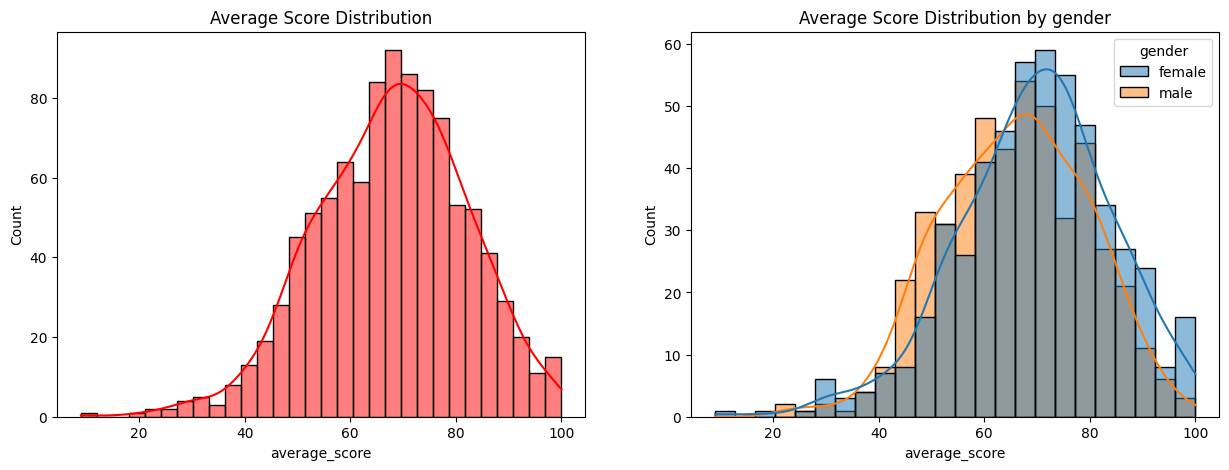

In [17]:
fig,axix=plt.subplots(1,2,figsize=(15,5))

plt.subplot(121)
sns.histplot(
    data=df,
    x="average_score",
    bins=30,
    kde=True,
    color='red'
)
plt.title("Average Score Distribution")

plt.subplot(122)
sns.histplot(
    data=df,
    x='average_score',
    kde=True,
    hue=df['gender']
)

plt.title("Average Score Distribution by gender")